<a href="https://colab.research.google.com/github/visheshgupta19/Explainable-Techniques-II/blob/main/Explainable_Techniques_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/visheshgupta19/Explainable-Techniques-II/refs/heads/main/heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

# Initial EDA

In [4]:
# general analysis

print(df.shape)
print('--------------')
print(df.info())
print('--------------')
print(df.describe())

(297, 14)
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None
--------------
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000

In [5]:
# we are looking at condition as target variable
df["condition"].value_counts(normalize=True)

,proportion
condition,
0,0.538721
1,0.461279


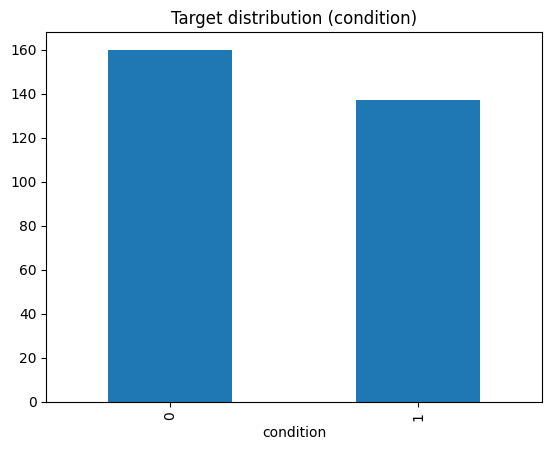

In [6]:
df["condition"].value_counts().plot(kind="bar")
plt.title("Target distribution (condition)")
plt.show()

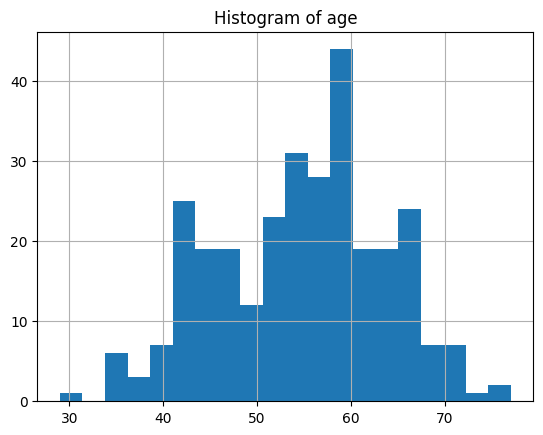

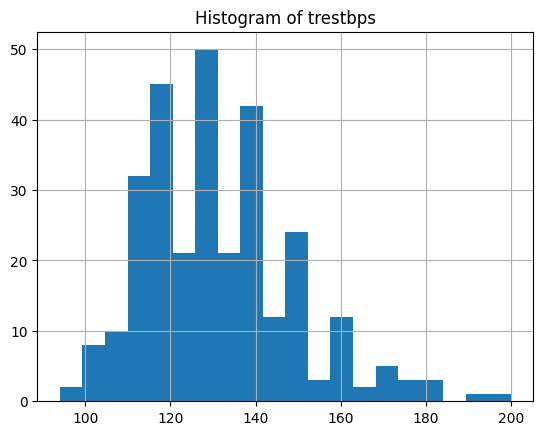

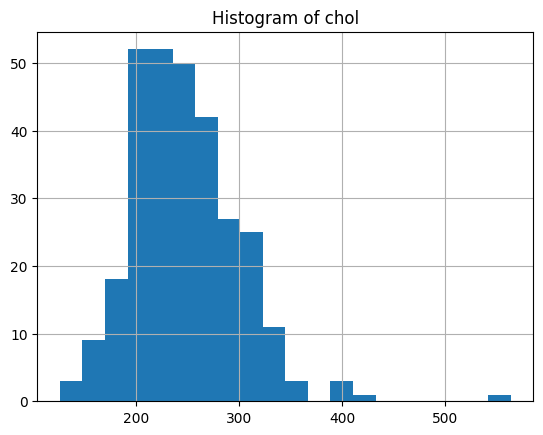

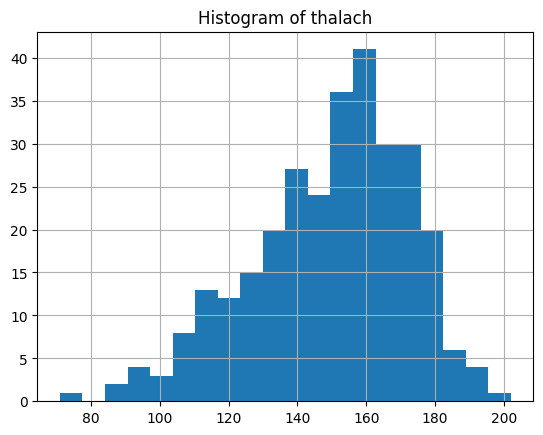

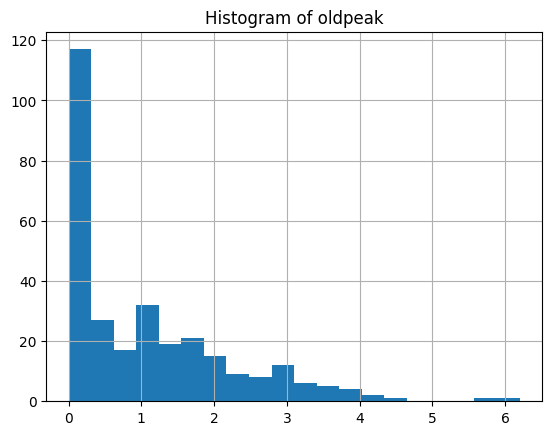

In [7]:
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
for col in num_features:
    df[col].hist(bins=20)
    plt.title(f"Histogram of {col}")
    plt.show()

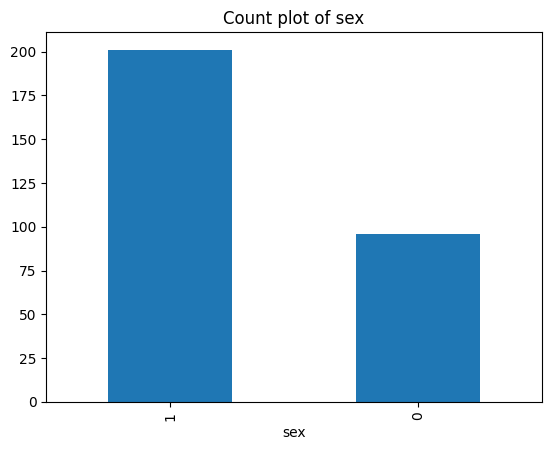

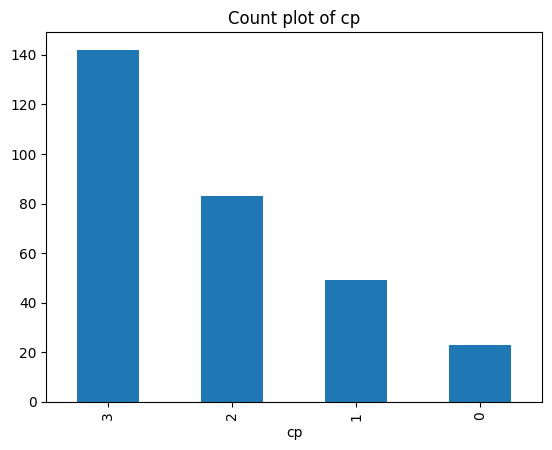

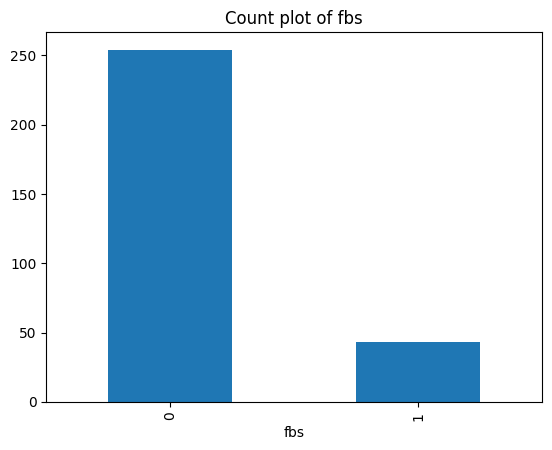

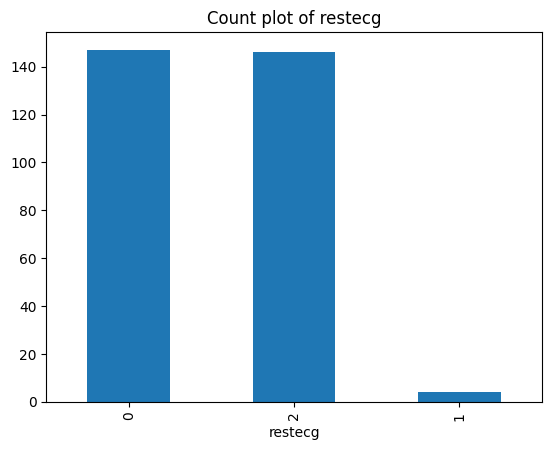

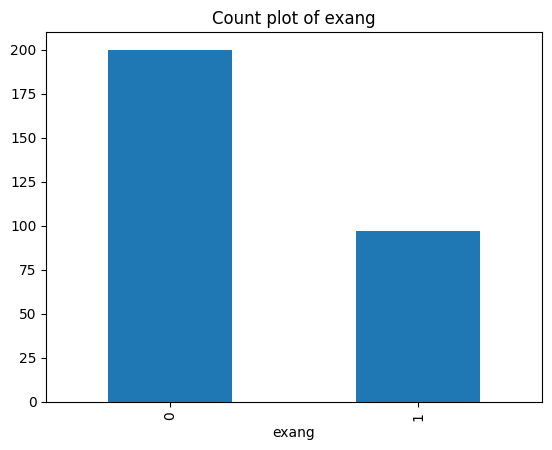

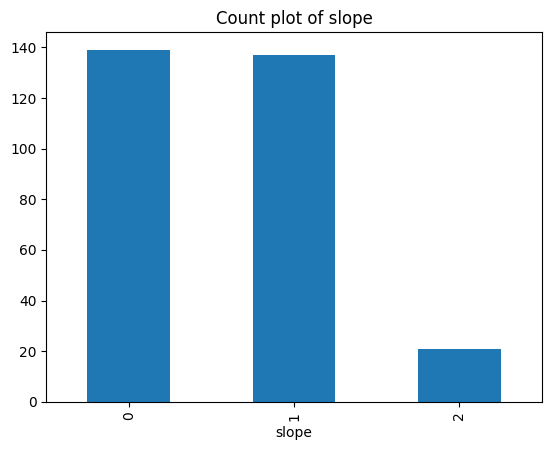

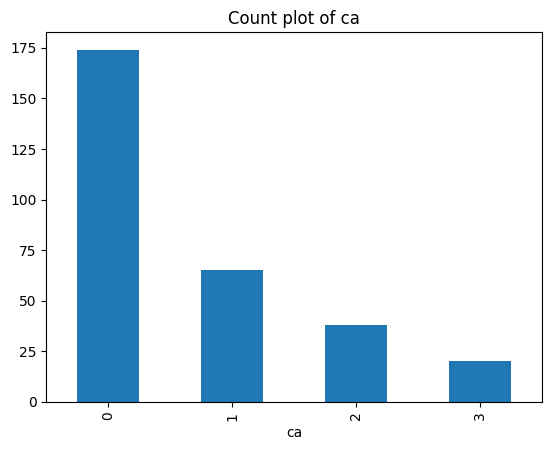

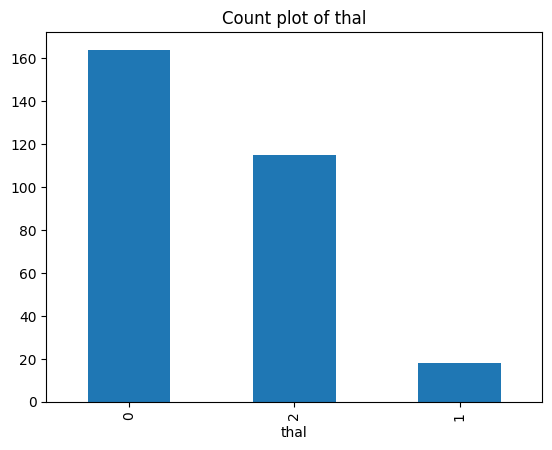

In [8]:
cat_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
for col in cat_features:
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Count plot of {col}")
    plt.show()

In [9]:
corr = df[num_features].corr()
print(corr)

               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.290476  0.202644 -0.394563  0.197123
trestbps  0.290476  1.000000  0.131536 -0.049108  0.191243
chol      0.202644  0.131536  1.000000 -0.000075  0.038596
thalach  -0.394563 -0.049108 -0.000075  1.000000 -0.347640
oldpeak   0.197123  0.191243  0.038596 -0.347640  1.000000


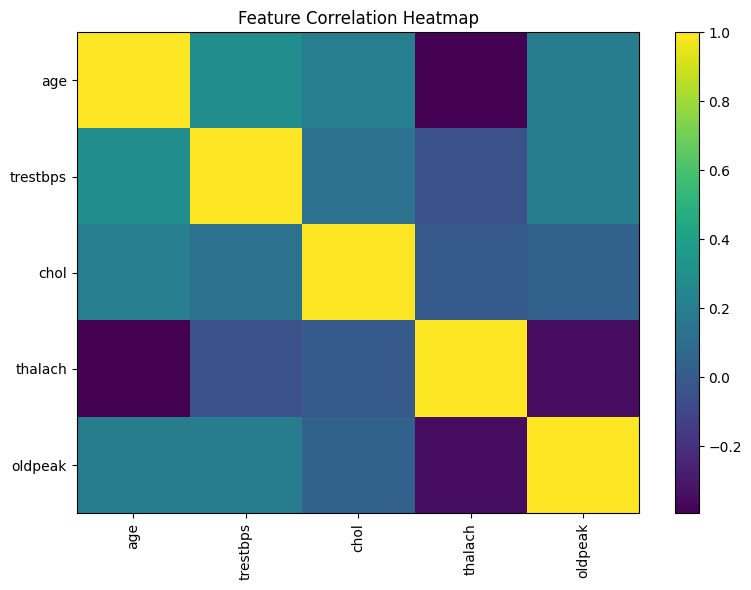

In [10]:
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [11]:
X = df.drop("condition", axis=1)
y = df["condition"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
features_to_plot = ["age", "chol", "oldpeak"]

# ICE Plots

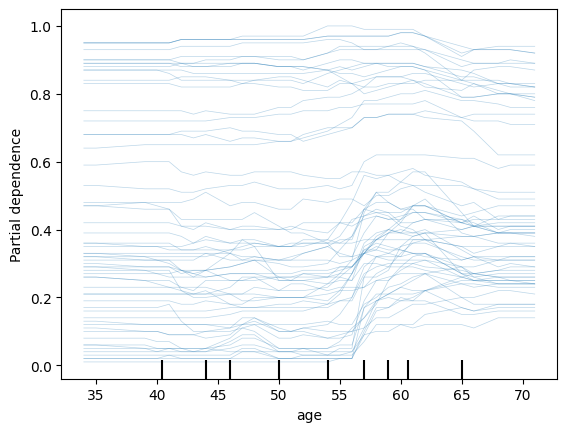

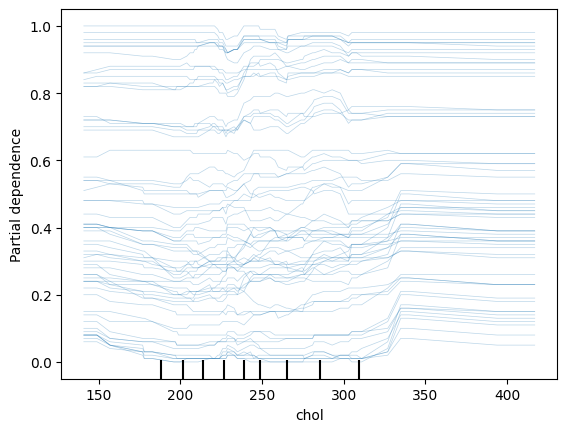

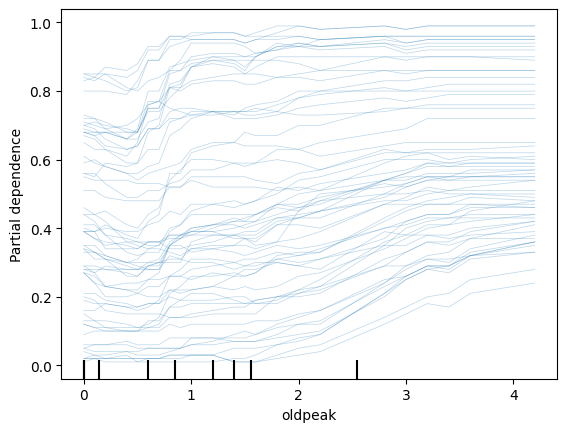

In [14]:
# Use PartialDependenceDisplay to display the ICE plot
# PartialDependenceDisplay.from_estimator(model, X_test, features_to_plot, kind='individual') #kind='individual'

for i in features_to_plot:
  PartialDependenceDisplay.from_estimator(model, X_test, [i], kind='individual')

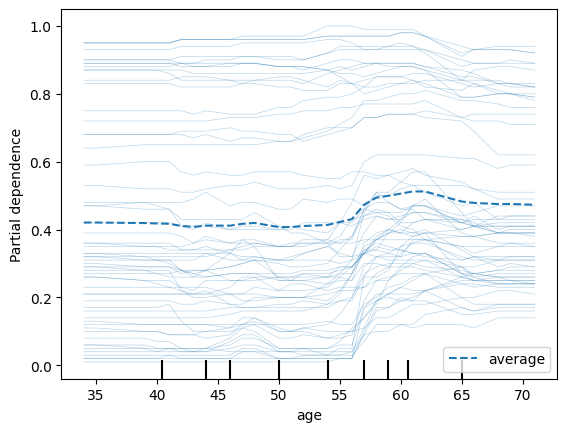

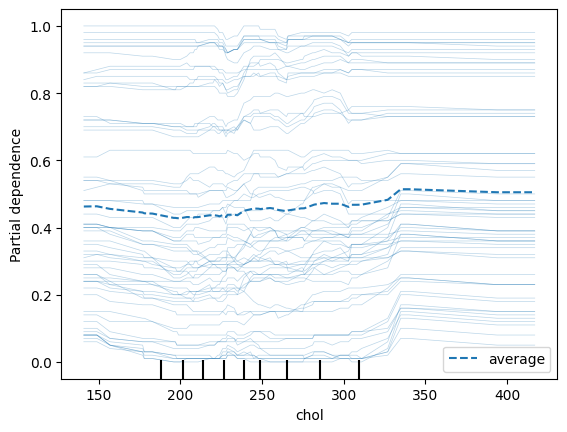

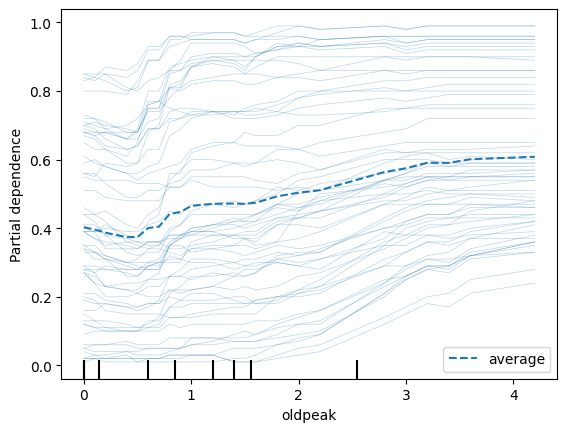

In [15]:
# Use PartialDependenceDisplay to display the ICE plot and the PDP overlayed on top
#PartialDependenceDisplay.from_estimator(model, X_test, features_to_plot, kind='both') #kind='both'

for i in features_to_plot:
  PartialDependenceDisplay.from_estimator(model, X_test, [i], kind='both')

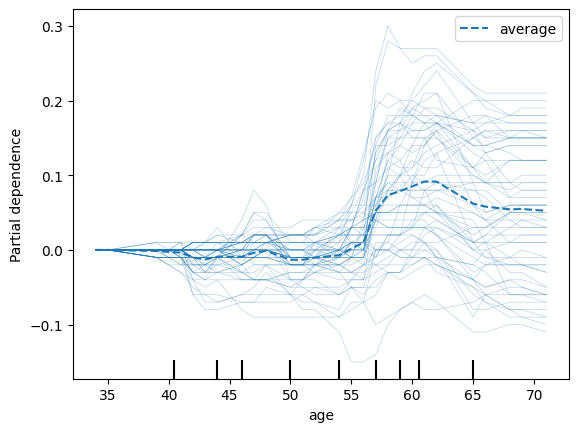

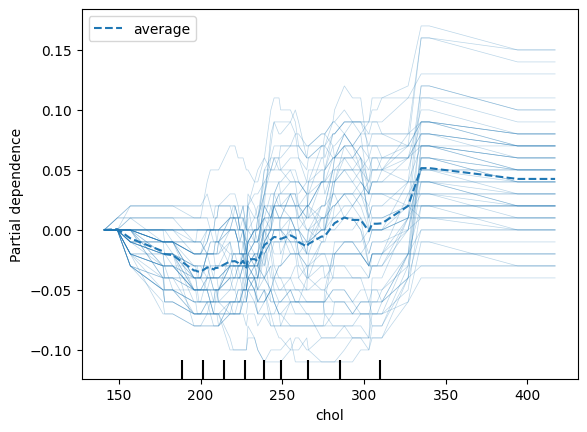

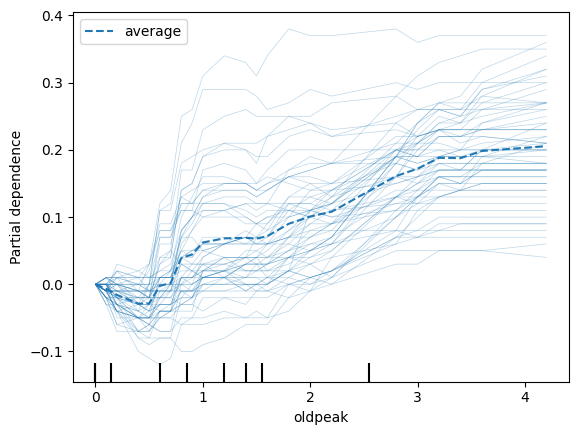

In [16]:
# Centered ICE plots (c-ICE)
# PartialDependenceDisplay.from_estimator(model, X_test, features_to_plot, kind='both', centered=True)

for i in features_to_plot:
  PartialDependenceDisplay.from_estimator(model, X_test, [i], kind='both', centered=True)

# PDP

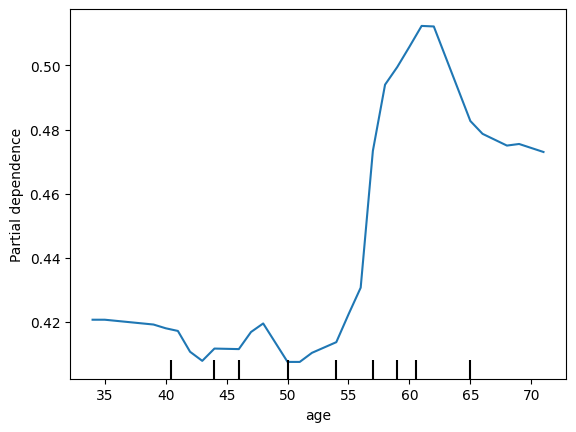

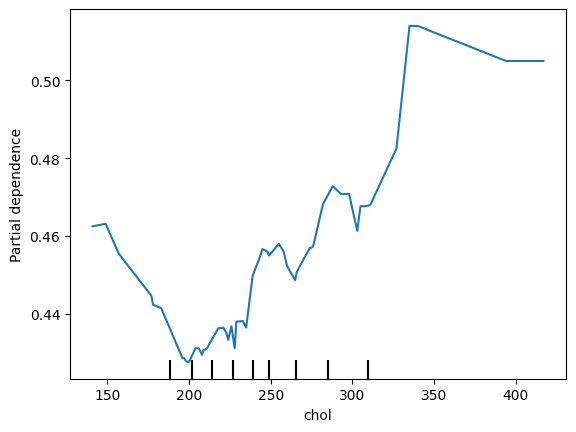

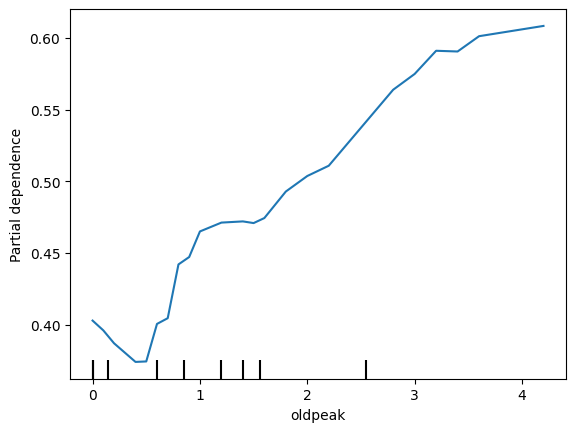

In [17]:
#PartialDependenceDisplay.from_estimator(model, X_test, features_to_plot, kind='average')

for i in features_to_plot:
  PartialDependenceDisplay.from_estimator(model, X_test, [i], kind='average')

# ALE Plots

In [18]:
#!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

In [19]:
from alepython import ale_plot

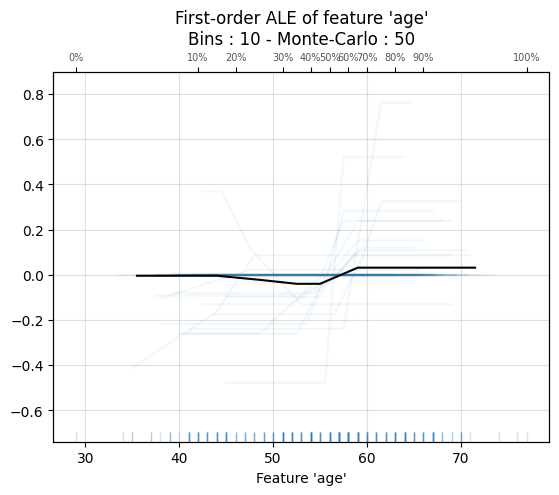

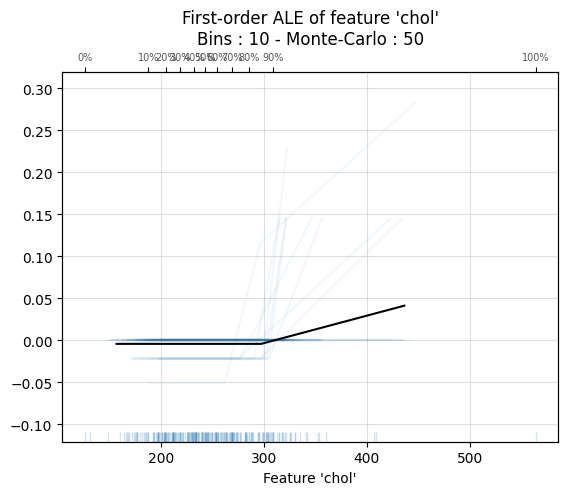

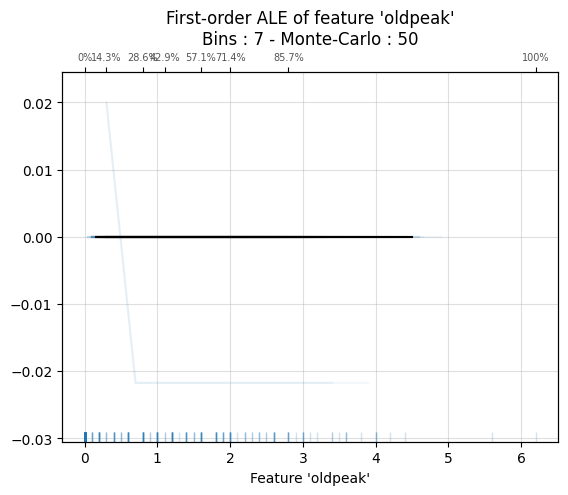

In [20]:
for i in features_to_plot:
  ale_plot(model, X_train, i, monte_carlo=True)

In [21]:
# Need to figure out 2D
# temp_cols = ["age", "chol"]
# ale_plot(model, X_train, temp_cols, bins=10)